In [13]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
import torch

In [167]:
from data_utils import load_nerf_data

In [228]:
images, train_poses, camera_angle_x = load_nerf_data('./data/nerf_synthetic', 'ship', 'transforms_train.json')

In [232]:
train_poses = train_poses[:, :3, :3]

In [233]:
train_poses.shape

(100, 3, 3)

In [230]:
type(train_poses)

numpy.ndarray

In [ ]:
def get_camera_positions_from_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extract camera positions from the transform matrices
    camera_positions = []
    images = []
    dir = file_path.replace('/transforms_train.json', '')

    for frame in data['frames']:
        transform_matrix = np.array(frame['transform_matrix'])
        # The camera position in homogeneous coordinates is the last column of the transform matrix
        camera_position = transform_matrix[:3, 3]
        camera_positions.append(camera_position)
        images.append(dir + frame['file_path'].replace('./', '/') + '.png')

    # Convert to a PyTorch tensor for easy manipulation
    camera_positions = torch.tensor(camera_positions)
    return camera_positions

In [101]:
from utils import camera_position_from_extrinsic_matrix

In [250]:
def plot_camera_space(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extract camera positions from the transform matrices
    camera_positions = []
    images = []
    dir = file_path.replace('/transforms_train.json', '')

    for frame in data['frames']:
        transform_matrix = np.array(frame['transform_matrix'])
        # The camera position in homogeneous coordinates is the last column of the transform matrix
        # print(transform_matrix.shape)
        camera_position = transform_matrix[:3, 3]
        # print(camera_position.shape)

        camera_positions.append(camera_position)

        images.append(dir + frame['file_path'].replace('./', '/') + '.png')

    camera_positions = torch.tensor(camera_positions)
    # Plotting the camera positions in 3D
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(camera_positions[:, 0], camera_positions[:, 1], camera_positions[:, 2], c='r', marker='o')
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.set_title('3D Camera Positions')

    plt.show()

    return camera_positions, images


In [249]:
camera_position[0]

tensor([-3.9643,  0.1849,  0.7074], dtype=torch.float64)

(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 4)
(3,)
(4, 

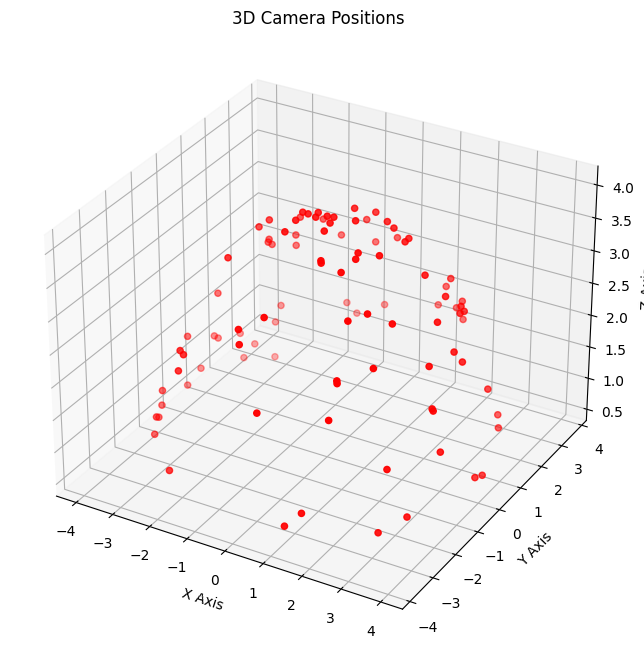

In [248]:
camera_position, _ = plot_camera_space('./data/nerf_synthetic/ship/transforms_train.json')

In [223]:
train_poses.shape

(100, 4, 4)

Text(0.5, 0.92, '3D Camera Positions')

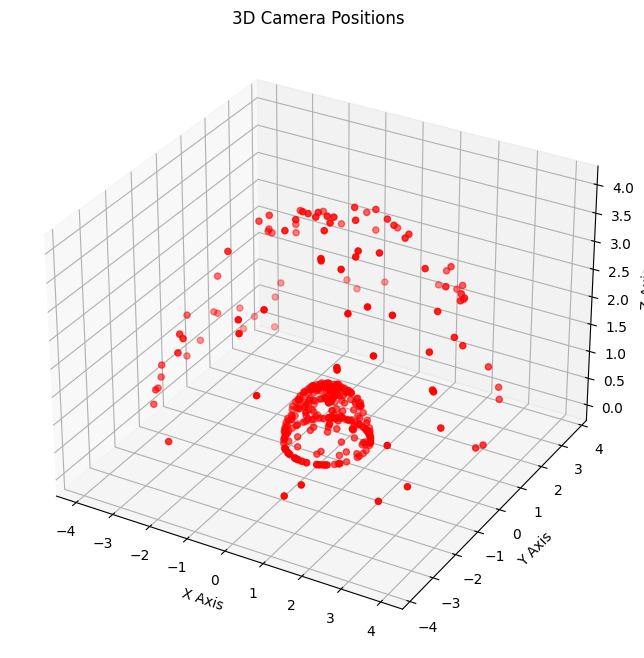

In [222]:
fig = plt.figure(figsize=(12, 8))
ax2 = fig.add_subplot(111, projection='3d')

camera_position = train_poses

ax2.scatter(camera_position[:, 0], camera_position[:, 1], camera_position[:, 2], c='r', marker='o')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')
ax2.set_zlabel('Z Axis')
ax2.set_title('3D Camera Positions')

In [117]:
def plot_camera_space(file_paths, dir='./data/nerf_synthetic/'):
    num_plots = len(file_paths)
    cols = 3
    rows = num_plots // cols + (num_plots % cols > 0)
    fig, axs = plt.subplots(rows, cols, figsize=(12, rows * 4), subplot_kw={'projection': '3d'})
    
    if num_plots % cols > 0:
        for ax in axs.flat[num_plots:]:
            ax.axis('off')  # Turn off unused subplots

    for i, file_path in enumerate(file_paths):
        full_path = os.path.join(dir, file_path, 'transforms_train.json')
        with open(full_path, 'r') as file:
            data = json.load(file)

        # Extract camera positions
        # camera_positions = [np.array(frame['transform_matrix'])[:3, 3] for frame in data['frames']]
        camera_positions = np.array(camera_positions)  # Convert to a single numpy array

        # Plotting
        ax = axs.flat[i]
        ax.scatter(camera_positions[:, 0], camera_positions[:, 1], camera_positions[:, 2], c='r', marker='o')
        ax.set_xlabel('X Axis')
        ax.set_ylabel('Y Axis')
        ax.set_zlabel('Z Axis')
        ax.set_title(file_path)

    plt.tight_layout()
    plt.show()

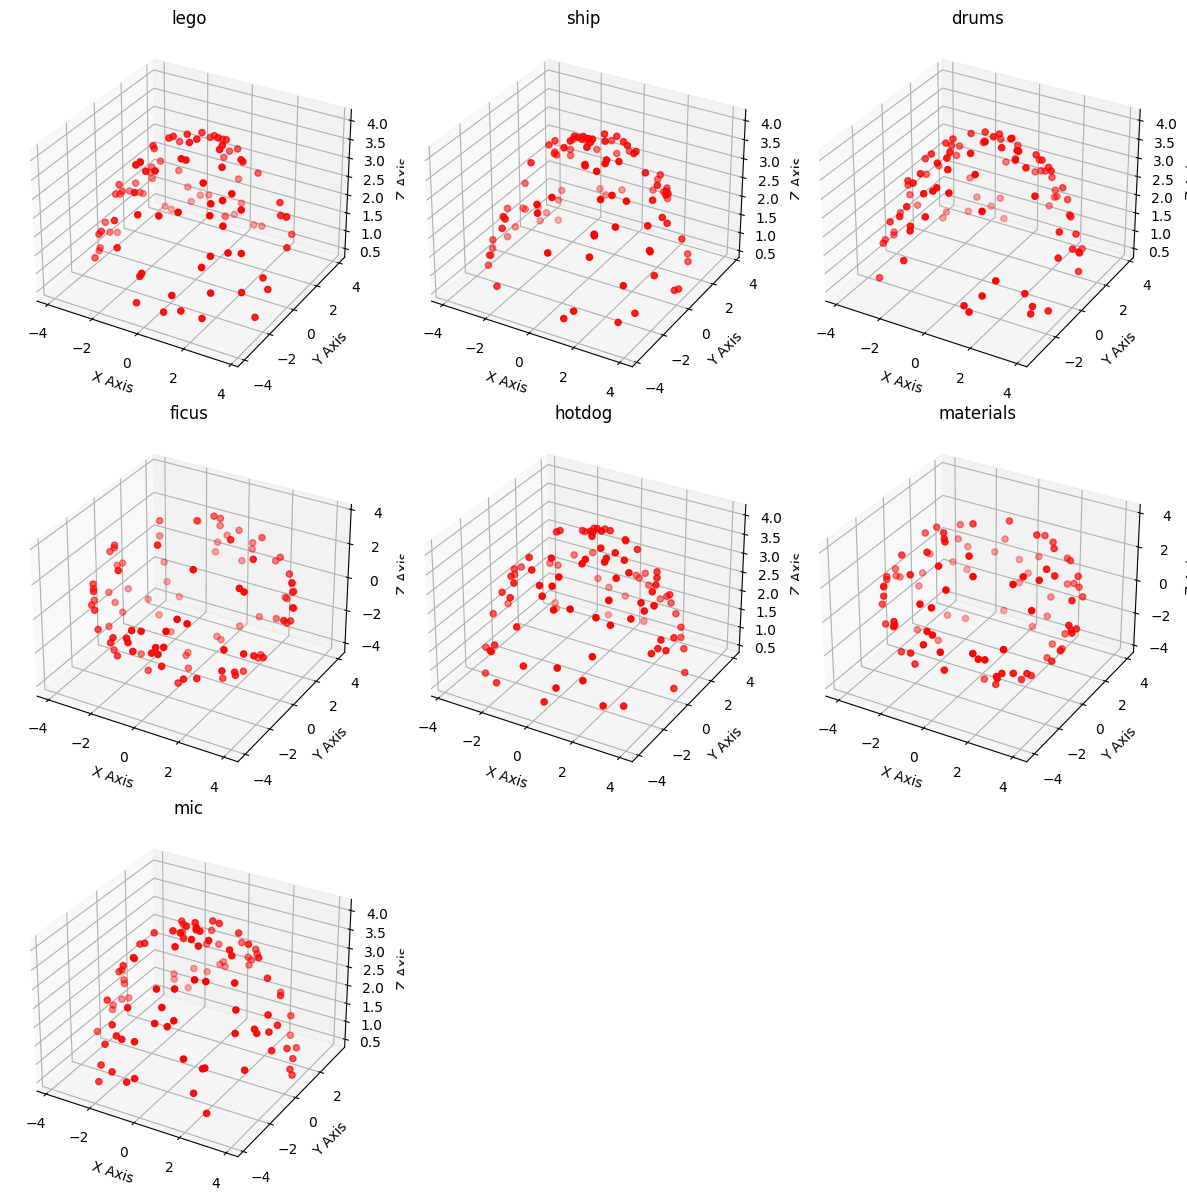

In [17]:
plot_camera_space(['lego', 'ship', 'drums', 'ficus', 'hotdog', 'materials', 'mic'])

In [ ]:
camera_positions, images = plot_camera_space('./data/nerf_synthetic/ficus/transforms_train.json')

In [306]:
def load_image(index):
    image_path = images.numpy()[index]
    image = Image.open(image_path)
    resized_image = image.resize((100, 100))
    return np.array(resized_image)

In [97]:
from utils import plot_3d_camera_positions

In [108]:
camera_positions_np[0]

array([0.54986286, 3.93531919, 0.6789065 ])

In [107]:
camera_position_from_extrinsic_matrix(camera_positions_np[0])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [206]:
train_poses[:, :3].shape

(100, 3, 4)

In [237]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from PIL import Image

# Convert to a NumPy array for compatibility with scikit-learn

# camera_positions_np = camera_positions.numpy()
# camera_positions_np = [camera_position_from_extrinsic_matrix(transform) for transform in camera_positions_np]
camera_positions_np = train_poses

# Normalize the camera positions
# scaler = StandardScaler()
# camera_positions_normalized = scaler.fit_transform(camera_positions_np)

# Apply K-Means Clustering to find 10 clusters
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(camera_positions_np)
labels = kmeans.labels_

# Calculate centroids of each cluster
centroids = []
for i in range(n_clusters):
    cluster_points = camera_positions_np[labels == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

# Find the image closest to each centroid
selected_images_indices = []
for centroid in centroids:
    distances = np.linalg.norm(camera_positions_np - centroid, axis=1)
    closest_image_idx = np.argmin(distances)
    selected_images_indices.append(closest_image_idx)


# Highlight the selected camera positions in red
selected_positions = camera_positions_np[selected_images_indices]
    
plot_3d_positions(camera_positions_np, selected_positions, 'Clustered Camera Positions (Selected Candidates in Red)', labels, color='red')

# plot_images_as_grid(selected_images_indices)


ValueError: Found array with dim 3. KMeans expected <= 2.

In [80]:
selected_images_indices

[2, 60, 43, 88, 42, 46, 83, 63, 76, 77]

Number of clusters: 65


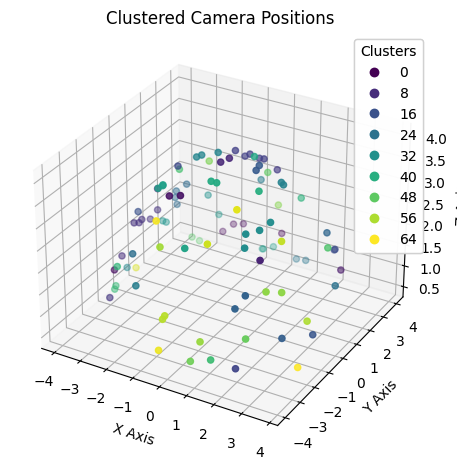

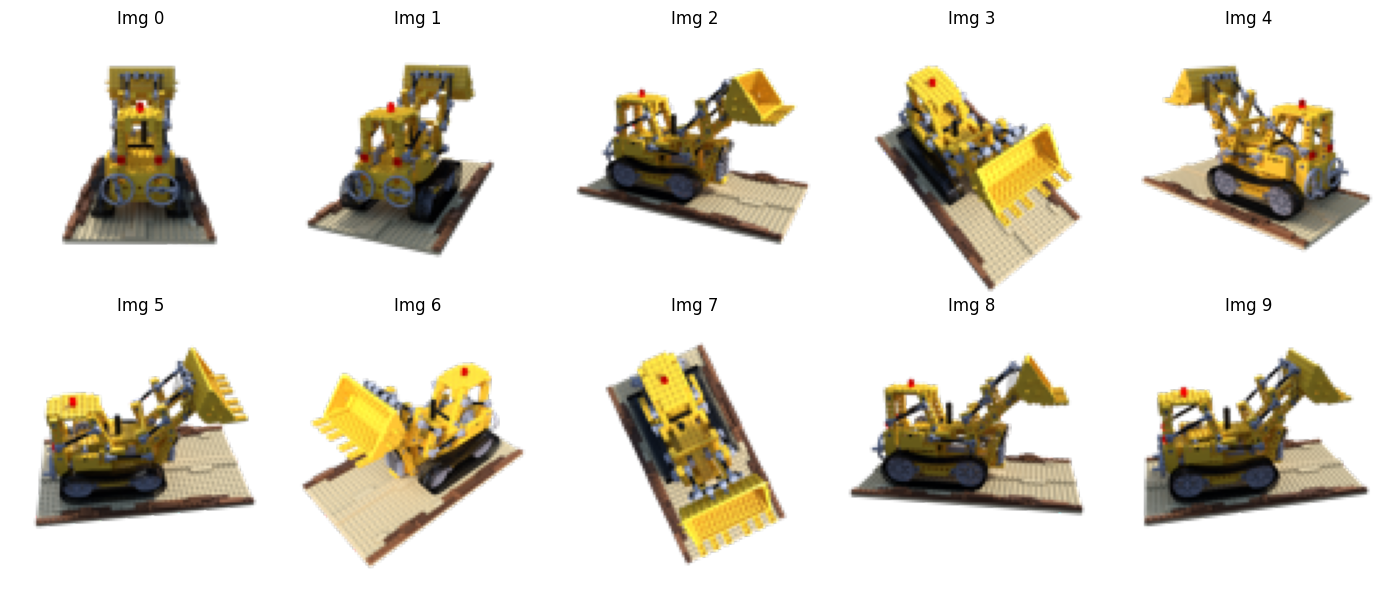

In [62]:
from sklearn.cluster import DBSCAN

# Convert to a NumPy array for compatibility with scikit-learn
camera_positions_np = camera_positions.numpy()

# Normalize the camera positions
scaler = StandardScaler()
camera_positions_normalized = scaler.fit_transform(camera_positions_np)

# Apply DBSCAN Clustering
# These parameters (eps and min_samples) might need to be adjusted for your specific data
dbscan = DBSCAN(eps=0.3, min_samples=1).fit(camera_positions_normalized)
labels = dbscan.labels_

# Count the number of unique clusters (excluding noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

# Filtering noise points (labelled as -1)
valid_labels = labels[labels != -1]
valid_positions = camera_positions_np[labels != -1]

# Plot the camera positions in 3D space, coloring them based on their cluster
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(211, projection='3d')
scatter = ax1.scatter(valid_positions[:, 0], valid_positions[:, 1], valid_positions[:, 2], c=valid_labels, cmap='viridis')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.set_title('Clustered Camera Positions')
legend1 = ax1.legend(*scatter.legend_elements(), title="Clusters")
ax1.add_artist(legend1)

# Plot the selected images in a 2-row grid beneath the 3D plot
# Selecting one image per cluster (if available)
selected_images_indices = []
for i in range(n_clusters):
    cluster_indices = np.where(valid_labels == i)[0]
    if len(cluster_indices) > 0:
        selected_images_indices.append(cluster_indices[0])  # Selecting the first image in each cluster

# Adjust number of images to plot to maximum 10
selected_images_indices = selected_images_indices[:10]

fig2 = plt.figure(figsize=(14, 6))
for i, idx in enumerate(selected_images_indices):
    image = load_image(idx)
    ax = fig2.add_subplot(2, 5, i + 1)  # Corrected subplot indices for image grid
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f'Img {idx}')

plt.tight_layout()
plt.show()



# HDBScan

In [64]:
!pip3 install hdbscan


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Mirwi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Number of clusters: 29


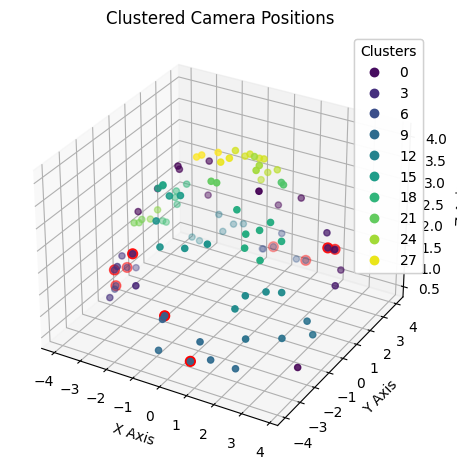

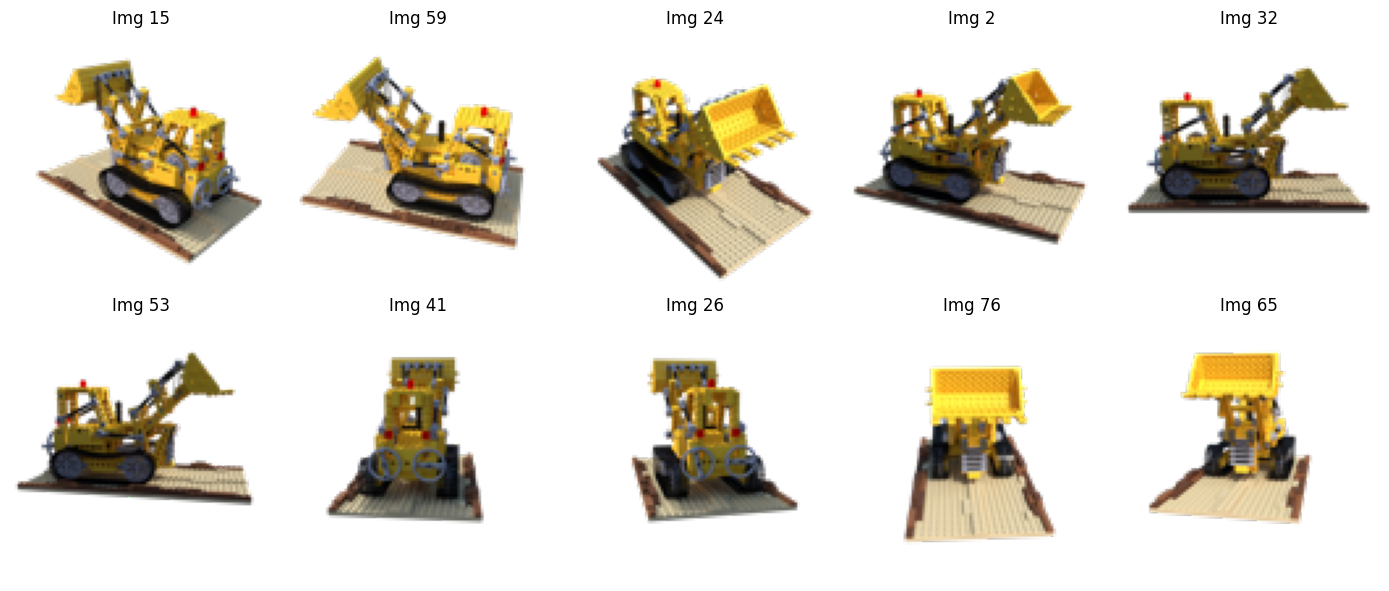

In [73]:
from hdbscan import HDBSCAN

camera_positions_np = camera_positions.numpy()

# Normalize the camera positions
scaler = StandardScaler()
camera_positions_normalized = scaler.fit_transform(camera_positions_np)

# Apply HDBSCAN Clustering
hdbscan = HDBSCAN(min_cluster_size=2, min_samples=1)  # Adjust these parameters as needed
labels = hdbscan.fit_predict(camera_positions_normalized)

# Count the number of unique clusters (excluding noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

# Calculate centroids of each cluster
centroids = []
for i in range(n_clusters):
    cluster_points = camera_positions_np[labels == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

# Find the image closest to each centroid
selected_images_indices = []
for centroid in centroids:
    distances = np.linalg.norm(camera_positions_np - centroid, axis=1)
    closest_image_idx = np.argmin(distances)
    selected_images_indices.append(closest_image_idx)

# Adjust number of images to plot to maximum 10
selected_images_indices = selected_images_indices[:10]


# Plot the camera positions in 3D space, coloring them based on their cluster
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(211, projection='3d')
scatter = ax1.scatter(camera_positions_np[:, 0], camera_positions_np[:, 1], camera_positions_np[:, 2], c=labels, cmap='viridis')

# Highlight the selected camera positions in red
selected_positions = camera_positions_np[selected_images_indices]
ax1.scatter(selected_positions[:, 0], selected_positions[:, 1], selected_positions[:, 2], c='red', marker='o', s=50)  # s is the size of the marker

ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.set_title('Clustered Camera Positions')
legend1 = ax1.legend(*scatter.legend_elements(), title="Clusters")
ax1.add_artist(legend1)

fig2 = plt.figure(figsize=(14, 6))
for i, idx in enumerate(selected_images_indices):
    image = load_image(idx)
    ax = fig2.add_subplot(2, 5, i + 1)  # Corrected subplot indices for image grid
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f'Img {idx}')

plt.tight_layout()
plt.show()

In [214]:
train_poses[:3, 3]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [220]:
np.array([x[:3,3] for x in train_poses])

array([[-3.96426296e+00,  1.84898108e-01,  7.07411051e-01],
       [ 2.78240585e+00,  1.15630531e+00,  2.67790532e+00],
       [ 1.77313292e+00, -2.49063373e+00,  2.62730742e+00],
       [ 1.60309529e+00, -1.75405037e+00,  3.25628495e+00],
       [-1.77037716e-03,  5.48085570e-03,  4.03112507e+00],
       [-2.95764899e+00,  2.46867585e+00,  1.18657124e+00],
       [ 2.70048475e+00,  1.49755979e+00,  2.59127307e+00],
       [ 1.38329184e+00,  3.00424242e+00,  2.30456758e+00],
       [ 1.91785526e+00,  2.25171518e+00,  2.73890662e+00],
       [ 3.30991316e+00,  3.55878949e-01,  2.27328491e+00],
       [-3.49157357e+00,  1.89117718e+00,  6.94524169e-01],
       [-6.17577851e-01, -3.26251715e-01,  3.97015834e+00],
       [-6.85625434e-01, -2.59517765e+00,  3.00748563e+00],
       [ 5.78603387e-01,  2.59643346e-01,  3.98092985e+00],
       [ 2.81676579e+00,  6.54038265e-02,  2.88297629e+00],
       [ 3.33939195e+00, -1.03137505e+00,  2.00866294e+00],
       [ 3.36107349e+00, -1.02133608e+00

In [241]:
camera_positions_np.shape

(100, 3, 3)

In [239]:
from hdbscan import HDBSCAN

camera_positions_np = [x[:3,3] for x in train_poses]
# Normalize the camera positions
scaler = StandardScaler()
camera_positions_normalized = scaler.fit_transform(train_poses)

# Apply HDBSCAN Clustering
hdbscan = HDBSCAN(min_cluster_size=2, min_samples=1)  # Adjust these parameters as needed
labels = hdbscan.fit_predict(camera_positions_normalized)

# Count the number of unique clusters (excluding noise points)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

# Calculate centroids of each cluster
centroids = []
for i in range(n_clusters):
    cluster_points = camera_positions_np[labels == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)

# Find the image closest to each centroid
selected_images_indices = []
for centroid in centroids:
    distances = np.linalg.norm(camera_positions_np - centroid, axis=1)
    closest_image_idx = np.argmin(distances)
    selected_images_indices.append(closest_image_idx)

# Adjust number of images to plot to maximum 10
selected_images_indices = selected_images_indices[:10]


# Plot the camera positions in 3D space, coloring them based on their cluster
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(211, projection='3d')
scatter = ax1.scatter(camera_positions_np[:, 0], camera_positions_np[:, 1], camera_positions_np[:, 2], c=labels, cmap='viridis')

# Highlight the selected camera positions in red
selected_positions = camera_positions_np[selected_images_indices]
ax1.scatter(selected_positions[:, 0], selected_positions[:, 1], selected_positions[:, 2], c='red', marker='o', s=50)  # s is the size of the marker

ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.set_title('Clustered Camera Positions')
legend1 = ax1.legend(*scatter.legend_elements(), title="Clusters")
ax1.add_artist(legend1)

# fig2 = plt.figure(figsize=(14, 6))
# for i, idx in enumerate(selected_images_indices):
#     image = load_image(idx)
#     ax = fig2.add_subplot(2, 5, i + 1)  # Corrected subplot indices for image grid
#     ax.imshow(image)
#     ax.axis('off')
#     ax.set_title(f'Img {idx}')

# plt.tight_layout()
# plt.show()

ValueError: Found array with dim 3. StandardScaler expected <= 2.

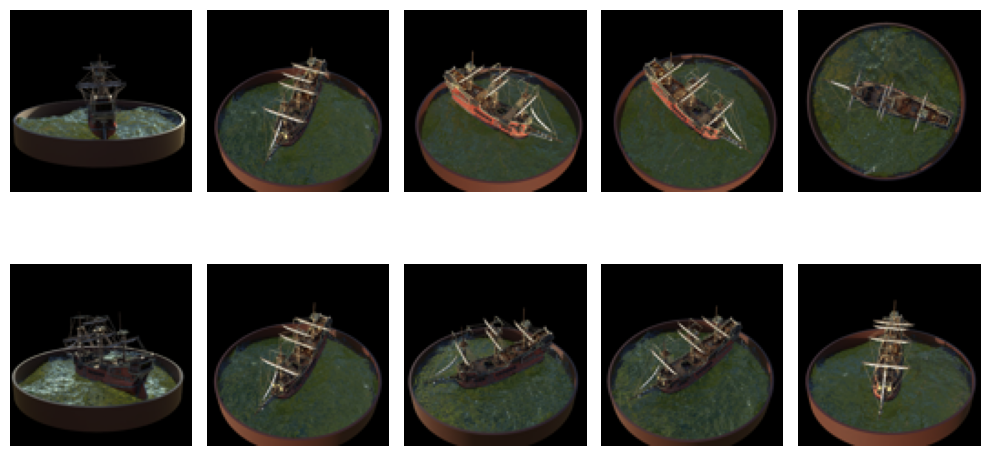

In [194]:

fig, axs = plt.subplots(2, 5, figsize=(10, 6))

# Loop through all axes and images
for ax, image in zip(axs.ravel(), images):
    ax.imshow(image.detach().cpu().numpy(), cmap='viridis')  # You can change the colormap if needed
    ax.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

# New Code for K-means

torch.float64
Selected indices:  [14, 19, 34, 4, 58, 30, 40, 18, 12, 17]


C:\Users\Mirwi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


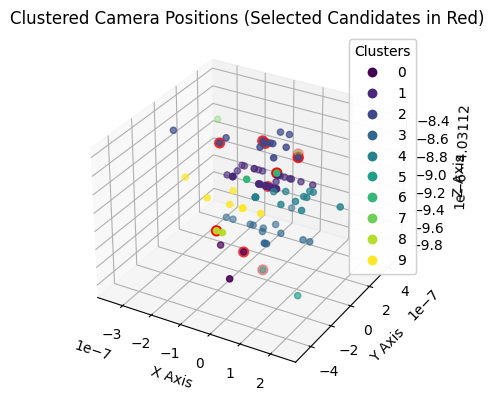

In [300]:
import os
import json
from PIL import Image
import torchvision.transforms.functional as TF
import numpy as np
import torch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
base_dir = './data/nerf_synthetic/'  # Update with your path
subject = 'ship'  # Update with your subject
json_file = 'transforms_train.json'
images, train_poses, camera_angle_x = load_nerf_data(base_dir, subject, json_file)

# Convert poses to camera positions
# camera_positions_np = np.array([camera_position_from_extrinsic_matrix(torch.tensor(pose)) for pose in train_poses])
camera_positions_np = np.array([camera_position_from_extrinsic_matrix(torch.tensor(pose)).numpy() for pose in train_poses])

print(camera_position.dtype)
# Apply K-Means Clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(camera_positions_np)
labels = kmeans.labels_

# Calculate centroids and find closest images
centroids = [np.mean(camera_positions_np[labels == i], axis=0) for i in range(n_clusters)]
selected_images_indices = [np.argmin(np.linalg.norm(camera_positions_np - centroid, axis=1)) for centroid in centroids]

# Highlight selected camera positions
selected_positions = camera_positions_np[selected_images_indices]
print('Selected indices: ', selected_images_indices)

# Plotting
plot_3d_positions(camera_positions_np, selected_positions, 'Clustered Camera Positions (Selected Candidates in Red)', labels)


In [304]:
selected_images_indices[0].dtype

dtype('int64')

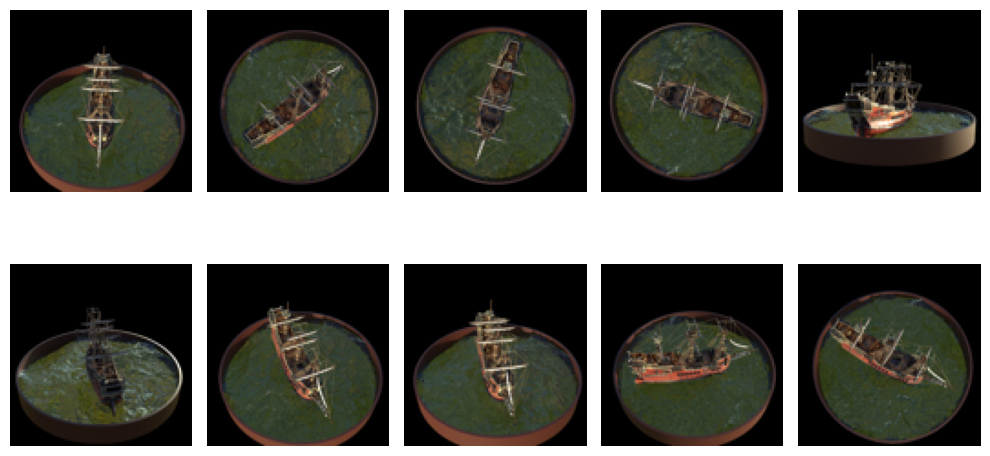

In [313]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6))

# Loop through all axes and images
for ax, image in zip(axs.ravel(), images[selected_images_indices]):
    ax.imshow(image.detach().cpu().numpy(), cmap='viridis')  # You can change the colormap if needed
    ax.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

# DBScan

Selected indices:  [array([-3.7252903e-09, -1.4901161e-08, -4.0311284e+00], dtype=float32)]


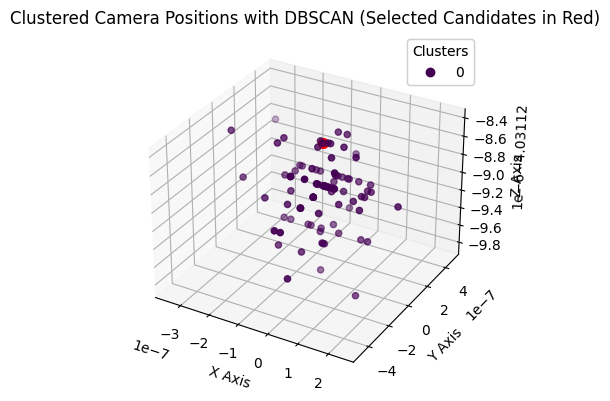

In [273]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.5, min_samples=2).fit(camera_positions_np)
labels = db.labels_

# Identify indices of non-noise clusters
unique_labels = set(labels)
non_noise_labels = [label for label in unique_labels if label != -1]

# Calculate centroids and find closest images for non-noise clusters
centroids = []
selected_images_indices = []

for label in non_noise_labels:
    cluster_points = camera_positions_np[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
    closest_image_idx = np.argmin(np.linalg.norm(cluster_points - centroid, axis=1))
    selected_images_indices.append(cluster_points[closest_image_idx])

# Highlight selected camera positions
selected_positions = np.array(selected_images_indices)
print('Selected indices: ', selected_images_indices)

# Plotting
plot_3d_positions(camera_positions_np, selected_positions, 'Clustered Camera Positions with DBSCAN (Selected Candidates in Red)', labels)



# HDBScan

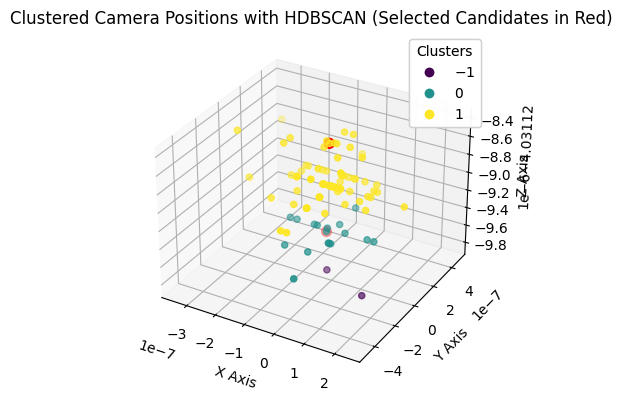

In [325]:
import hdbscan

hdb = hdbscan.HDBSCAN(cluster_selection_epsilon=0.1100525, min_cluster_size=3, cluster_selection_method='leaf').fit(camera_positions_np)
labels = hdb.labels_

# Identify indices of non-noise clusters
unique_labels = set(labels)
non_noise_labels = [label for label in unique_labels if label != -1]

# Calculate centroids and find closest images for non-noise clusters
centroids = []
selected_images_indices = []

for label in non_noise_labels:
    cluster_points = camera_positions_np[labels == label]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
    closest_image_idx = np.argmin(np.linalg.norm(cluster_points - centroid, axis=1))
    selected_images_indices.append(cluster_points[closest_image_idx])

# Highlight selected camera positions
selected_positions = np.array(selected_images_indices)

# Plotting
plot_3d_positions(camera_positions_np, selected_positions, 'Clustered Camera Positions with HDBSCAN (Selected Candidates in Red)', labels)

# ... [rest of your code] ...


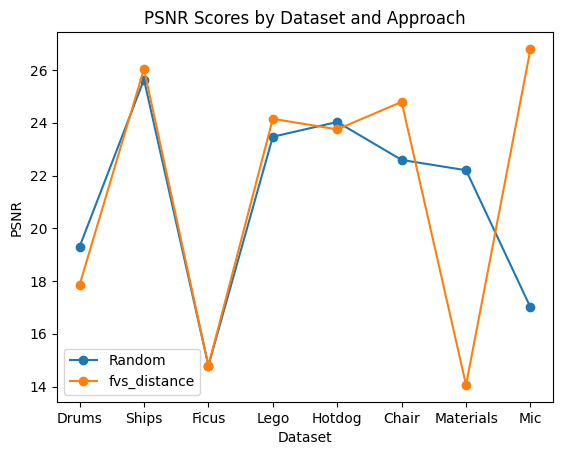

In [314]:
import matplotlib.pyplot as plt

# Example dataset, replace with your actual data
metrics = {
    "PSNR": {
        "Random": [19.30, 25.64, 14.79, 23.47, 24.03, 22.59, 22.20, 17.00],
        "fvs_distance": [17.85, 26.04, 14.79, 24.15, 23.75, 24.79, 14.06, 26.80],
        # ... other approaches
    },
    # ... other metrics
}

# Plotting PSNR metric
datasets = ["Drums", "Ships", "Ficus", "Lego", "Hotdog", "Chair", "Materials", "Mic"]
for approach, values in metrics["PSNR"].items():
    plt.plot(datasets, values, marker='o', label=approach)

plt.title('PSNR Scores by Dataset and Approach')
plt.xlabel('Dataset')
plt.ylabel('PSNR')
plt.legend()
plt.show()
